<a href="https://colab.research.google.com/github/Samidha07/Seminar_Malaria_Detection/blob/main/Seminar_Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = 'Train'
valid_path = 'Test'

In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
folders = glob('Train/*')

In [ ]:
folders

['Train/Uninfected', 'Train/Infected']

In [ ]:
# layers
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)


In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
#Creating The model
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 64)       

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Creating more training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
!rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
training_set = train_datagen.flow_from_directory('Train', target_size=(224,224), batch_size = 32, class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/50
13/13 [==============================] - 43s 3s/step - loss: 1.6122 - accuracy: 0.5288 - val_loss: 0.8773 - val_accuracy: 0.3284
Epoch 2/50
13/13 [==============================] - 28s 2s/step - loss: 0.7090 - accuracy: 0.5096 - val_loss: 0.6892 - val_accuracy: 0.5299
Epoch 3/50
13/13 [==============================] - 28s 2s/step - loss: 0.6736 - accuracy: 0.5865 - val_loss: 0.6709 - val_accuracy: 0.6343
Epoch 4/50
13/13 [==============================] - 30s 2s/step - loss: 0.6439 - accuracy: 0.6442 - val_loss: 0.8227 - val_accuracy: 0.3955
Epoch 5/50
13/13 [==============================] - 27s 2s/step - loss: 0.6133 - accuracy: 0.6442 - val_loss: 0.7114 - val_accuracy: 0.4776
Epoch 6/50
13/13 [==============================] - 28s 2s/step - loss: 0.5583 - accuracy: 0.7188 - val_loss: 1.0461 - val_accuracy: 0.4030
Epoch 7/50
13/13 [==============================] - 28s 2s/step - loss: 0.5112 - accuracy: 0.7380 - val_loss: 1.3283 - val_accuracy: 0.3731
Epoch 8/50
13/13 [==

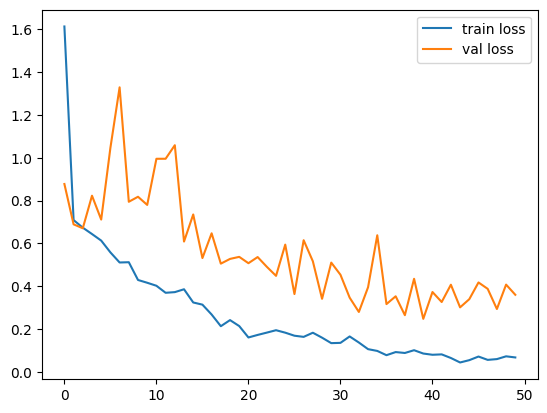

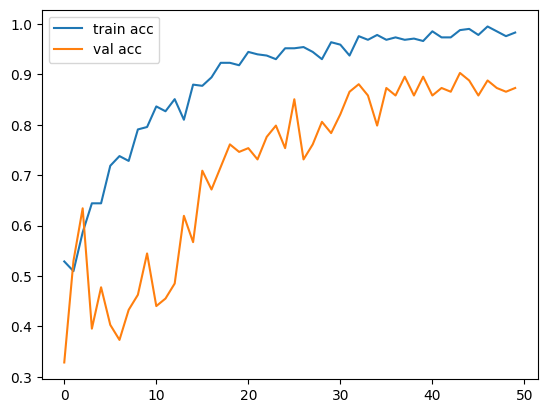

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

5/5 [==============================] - 2s 332ms/step


In [ ]:
y_pred

array([[9.98928845e-01, 1.07113575e-03],
       [9.99238491e-01, 7.61490548e-04],
       [9.99836922e-01, 1.63159653e-04],
       [8.79327297e-01, 1.20672740e-01],
       [9.78458047e-01, 2.15418581e-02],
       [2.10128967e-02, 9.78987038e-01],
       [9.99999940e-01, 1.56231774e-08],
       [9.88023818e-01, 1.19762104e-02],
       [9.99883354e-01, 1.16560223e-04],
       [1.40044680e-02, 9.85995471e-01],
       [1.01597488e-01, 8.98402452e-01],
       [9.66619730e-01, 3.33803035e-02],
       [1.15218505e-01, 8.84781480e-01],
       [2.63568163e-01, 7.36431777e-01],
       [9.96128023e-01, 3.87185067e-03],
       [9.00905252e-01, 9.90948081e-02],
       [4.91333008e-03, 9.95086551e-01],
       [1.21847866e-02, 9.87815261e-01],
       [9.99995530e-01, 4.42411101e-06],
       [9.97971177e-01, 2.02875468e-03],
       [9.99994457e-01, 5.46627780e-06],
       [9.99992907e-01, 6.99928387e-06],
       [3.48119624e-02, 9.65188086e-01],
       [9.99943912e-01, 5.60039989e-05],
       [5.878387

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1])

In [ ]:
#read the image and predict
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('Test/Uninfected/2.png',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 51ms/step


array([[0., 1.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 40ms/step


In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set)

# Print the accuracy
print('Test Accuracy:', test_accuracy)


5/5 [==============================] - 2s 326ms/step - loss: 0.3605 - accuracy: 0.8731
Test Accuracy: 0.8731343150138855


5/5 [==============================] - 2s 406ms/step


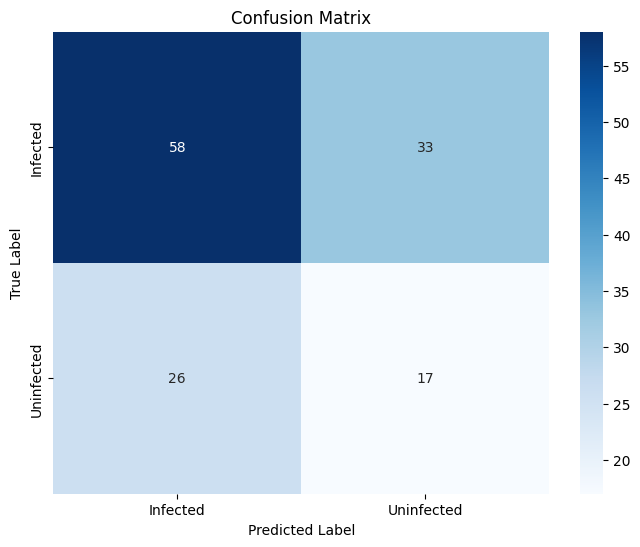

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels of the test set
y_true = test_set.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Infected', 'Uninfected'], yticklabels=['Infected', 'Uninfected'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
